# Лабораторная работа 2. Обработка и тарификация трафика NetFlow

Вариант 13

Лазарев Эдуард Артемович
N33471

Импортируем библиотеки, которые мы будем использовать для парсинга.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Объявим функцию, которая считает итоговую стоимость

In [2]:
def count_cost(
        data, # Таблица с данными
        ip, # IP обонента
        k, # Коэффициент тарификации
    ): 
        return k * data[(data["sa"] == ip) | (data["da"] == ip)]["ibyt"].sum() / (1024 ** 2) 

Объявим переменные со значениями из варианта

In [3]:
IP = '192.168.250.41'
K = 1

Используя pandas считаем данные из файла, проверим что всё правильно считалось

In [4]:
data = pd.read_csv("data.csv")
data.head()

,ts,te,td,sa,da,sp,dp,pr,flg,fwd,...,mpls8,mpls9,mpls10,cl,sl,al,ra,eng,exid,tr
0,2020-02-25 11:21:06,2020-02-25 11:29:59,533.00,192.168.250.3,23.226.231.226,80,3682,TCP,.A..S.,0,...,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,1,1970-01-01 03:00:00.000
1,2020-02-25 11:28:30,2020-02-25 11:30:01,90.27,192.168.250.50,40.114.211.99,61137,443,TCP,....S.,0,...,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,1,1970-01-01 03:00:00.000
2,2020-02-25 11:29:30,2020-02-25 11:30:01,31.58,192.168.250.3,23.226.231.226,80,28857,TCP,.A..S.,0,...,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,1,1970-01-01 03:00:00.000
3,2020-02-25 11:30:01,2020-02-25 11:30:01,0.00,192.168.250.62,192.168.250.1,58474,123,UDP,......,0,...,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,1,1970-01-01 03:00:00.000
4,2020-02-25 11:30:01,2020-02-25 11:30:01,0.00,192.168.250.1,192.168.250.62,123,58474,UDP,......,0,...,0-0-0,0-0-0,0-0-0,0.0,0.0,0.0,0.0.0.0,0/0,1,1970-01-01 03:00:00.000


Вызовем объявленную ранее функцию для нашего варианта

In [5]:
cost = count_cost(data, 
                  IP,
                  K)
print(f"Cost: {cost:.2f}")

Cost: 5.26


Полученный ответ: 5.26 руб

Построим график

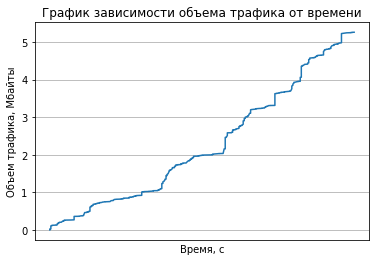

In [6]:
data_by_ip = data[(data["sa"] == IP) | (data["da"] == IP)].sort_values(by="ts")
data_x = data_by_ip["ts"]
data_y = data_by_ip["ibyt"].cumsum() / 1024 ** 2
plt.title('График зависимости объема трафика от времени')
plt.ylabel('Объем трафика, Мбайты')
plt.xlabel('Время, c')
plt.xticks([], [])

plt.plot(data_x, data_y)
plt.grid()
plt.show()